In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2015-malawi-flood-data/Malawi floods.csv


In [8]:
#load dataset
file_path = '/kaggle/input/2015-malawi-flood-data/Malawi floods.csv'
malawi_flood = pd.read_csv(file_path, index_col="Square_ID")
malawi_flood.sample(n=10, random_state=123)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,LC_Type1_mode
Square_ID,,,,,,,,,,,,,,,,,,,,,
4e6a107c-14ce-11ea-bce5-f49634744a41,35.19,-15.55,0.000000,995.917392,0.000000,0.0,0.0,5.790888,6.265551,6.616071,...,55.501115,0.000000,40.064331,20.829629,18.681926,6.936359,13.769957,10.698462,0.000000,12
4e5f7570-14ce-11ea-bce5-f49634744a41,34.80,-15.40,0.000000,383.188568,1.231163,0.0,0.0,9.618062,13.303895,12.744113,...,57.385677,0.628659,25.802371,32.942617,17.399040,3.320303,20.589136,8.459777,0.000000,10
4e4598eb-14ce-11ea-bce5-f49634744a41,34.60,-16.32,0.000000,281.604727,0.959006,0.0,0.0,18.013355,5.392385,12.249081,...,45.972601,0.000000,35.565913,34.880240,1.999615,0.878092,12.832311,4.840210,0.000000,10
4e45973e-14ce-11ea-bce5-f49634744a41,34.55,-15.37,0.000000,1096.713978,2.941325,0.0,0.0,5.220381,15.808821,8.786780,...,45.847281,5.522857,32.607555,25.236071,21.158367,2.808708,20.464651,5.109881,0.000000,9
4e62a39d-14ce-11ea-bce5-f49634744a41,34.89,-16.14,0.963899,70.286117,0.000000,0.0,0.0,9.235926,8.631158,12.670775,...,60.744787,0.000000,33.997202,36.946846,7.391024,1.382196,14.012323,8.130307,0.413405,12
4e684d3a-14ce-11ea-bce5-f49634744a41,35.09,-15.23,0.000000,487.095966,1.219465,0.0,0.0,1.411452,10.202345,10.570550,...,65.625887,0.000000,27.010952,23.403886,14.890393,7.773903,18.276068,18.552923,0.000000,12
4e6765c3-14ce-11ea-bce5-f49634744a41,35.01,-16.36,1.000000,54.476121,0.000000,0.0,0.0,7.941822,7.465641,18.237181,...,48.072915,0.488670,32.259493,23.233391,1.632181,2.861354,18.578652,13.836407,0.000000,12
4e6a0fb8-14ce-11ea-bce5-f49634744a41,35.18,-16.20,0.000000,709.882232,0.000000,0.0,0.0,8.410152,8.945134,7.460990,...,57.085365,1.013265,32.313727,18.715288,5.016680,1.648338,21.233867,8.658590,0.000000,9
4e57c011-14ce-11ea-bce5-f49634744a41,34.69,-15.34,0.000000,927.389167,2.941325,0.0,0.0,5.220381,15.808821,8.786780,...,45.847281,5.522857,32.607555,25.236071,21.158367,2.808708,20.464651,5.109881,0.000000,9


##### Information about dataset
The data is a flood data for Southern Malawi which experienced major flooding in 2015 with cyclone Idai. Approximate dates of impact are 13 January 2015. The map for Southern Malawi was broken up into approximately 1 km sq rectangles. Each rectangle has a unique ID. Each rectangle has been assigned a value which is the fraction (percentage) of that rectangle that was flooded in 2015 (`target_2015`).

Below is the description of the columns:

* **Elevation:** Mean elevation over the rectangle.
* **Dominant Land Cover Type:** The land cover types (most areas are predominantly grasslands, savannah or cropland).
* **Weekly Precipitation:** Historical rainfall data for each rectangle, for 18 weeks beginning 2 months before the flooding.

[Source](https://zindi.africa/competitions/2030-vision-flood-prediction-in-malawi/data)

In [9]:
#import data visualisation library
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='target_2015', ylabel='Density'>

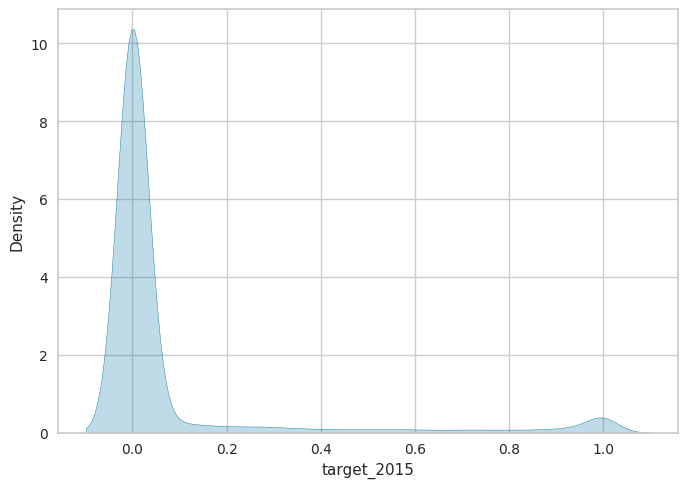

In [10]:
#distribution of initial target variable
sns.kdeplot(malawi_flood['target_2015'], fill=True)

#### Binning`target_2015` to add a multiclass column using `pd.cut()` 


In [11]:
#defining a function to create the bins and assigned the labels.
def class_creation(df):
    classes = ["Minor Flooding", "Moderate Flooding","Severe Flooding", "Extreme Flooding"]
    cut_points = [-1, 0.25, 0.5, 0.75, 1.0] #note that -1 starts this list so that 0 will be included
    df["Severity level"] = pd.cut(df["target_2015"], cut_points, labels=classes)
    return df

#applying the function
flood_data = class_creation(malawi_flood)

#checking the new dataframe
flood_data.sample(n=10, random_state = 123)

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,LC_Type1_mode,Severity level
Square_ID,,,,,,,,,,,,,,,,,,,,,
4e6a107c-14ce-11ea-bce5-f49634744a41,35.19,-15.55,0.000000,995.917392,0.000000,0.0,0.0,5.790888,6.265551,6.616071,...,0.000000,40.064331,20.829629,18.681926,6.936359,13.769957,10.698462,0.000000,12,Minor Flooding
4e5f7570-14ce-11ea-bce5-f49634744a41,34.80,-15.40,0.000000,383.188568,1.231163,0.0,0.0,9.618062,13.303895,12.744113,...,0.628659,25.802371,32.942617,17.399040,3.320303,20.589136,8.459777,0.000000,10,Minor Flooding
4e4598eb-14ce-11ea-bce5-f49634744a41,34.60,-16.32,0.000000,281.604727,0.959006,0.0,0.0,18.013355,5.392385,12.249081,...,0.000000,35.565913,34.880240,1.999615,0.878092,12.832311,4.840210,0.000000,10,Minor Flooding
4e45973e-14ce-11ea-bce5-f49634744a41,34.55,-15.37,0.000000,1096.713978,2.941325,0.0,0.0,5.220381,15.808821,8.786780,...,5.522857,32.607555,25.236071,21.158367,2.808708,20.464651,5.109881,0.000000,9,Minor Flooding
4e62a39d-14ce-11ea-bce5-f49634744a41,34.89,-16.14,0.963899,70.286117,0.000000,0.0,0.0,9.235926,8.631158,12.670775,...,0.000000,33.997202,36.946846,7.391024,1.382196,14.012323,8.130307,0.413405,12,Extreme Flooding
4e684d3a-14ce-11ea-bce5-f49634744a41,35.09,-15.23,0.000000,487.095966,1.219465,0.0,0.0,1.411452,10.202345,10.570550,...,0.000000,27.010952,23.403886,14.890393,7.773903,18.276068,18.552923,0.000000,12,Minor Flooding
4e6765c3-14ce-11ea-bce5-f49634744a41,35.01,-16.36,1.000000,54.476121,0.000000,0.0,0.0,7.941822,7.465641,18.237181,...,0.488670,32.259493,23.233391,1.632181,2.861354,18.578652,13.836407,0.000000,12,Extreme Flooding
4e6a0fb8-14ce-11ea-bce5-f49634744a41,35.18,-16.20,0.000000,709.882232,0.000000,0.0,0.0,8.410152,8.945134,7.460990,...,1.013265,32.313727,18.715288,5.016680,1.648338,21.233867,8.658590,0.000000,9,Minor Flooding
4e57c011-14ce-11ea-bce5-f49634744a41,34.69,-15.34,0.000000,927.389167,2.941325,0.0,0.0,5.220381,15.808821,8.786780,...,5.522857,32.607555,25.236071,21.158367,2.808708,20.464651,5.109881,0.000000,9,Minor Flooding


In [12]:
#checking the count of the classes in the new target column
flood_data['Severity level'].value_counts()

Severity level
Minor Flooding       14840
Extreme Flooding       834
Moderate Flooding      472
Severe Flooding        320
Name: count, dtype: int64

In [13]:
#unique entries for landcover types
sorted(flood_data['LC_Type1_mode'].unique())

[2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 17]

In [14]:
#dataset information
flood_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16466 entries, 4e3c3896-14ce-11ea-bce5-f49634744a41 to 4e6f5e01-14ce-11ea-bce5-f49634744a41
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   X                               16466 non-null  float64 
 1   Y                               16466 non-null  float64 
 2   target_2015                     16466 non-null  float64 
 3   elevation                       16466 non-null  float64 
 4   precip 2014-11-16 - 2014-11-23  16466 non-null  float64 
 5   precip 2014-11-23 - 2014-11-30  16466 non-null  float64 
 6   precip 2014-11-30 - 2014-12-07  16466 non-null  float64 
 7   precip 2014-12-07 - 2014-12-14  16466 non-null  float64 
 8   precip 2014-12-14 - 2014-12-21  16466 non-null  float64 
 9   precip 2014-12-21 - 2014-12-28  16466 non-null  float64 
 10  precip 2014-12-28 - 2015-01-04  16466 non-null  float64 
 11  precip 2015-01-04 -

**Key observation:**
- all columns are numerical except the newly added column
- no column in the dataset has missing values
- Land cover types is categorical (discrete) column

### Stastical Summaries

In [15]:
#descriptive statistics on dataset
malawi_flood.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,16466.0,NaN,NaN,NaN,35.077656,0.392395,34.26,34.76,35.05,35.39,35.86
Y,16466.0,NaN,NaN,NaN,-15.813802,0.359789,-16.64,-16.07,-15.8,-15.52,-15.21
target_2015,16466.0,NaN,NaN,NaN,0.076609,0.228734,0.0,0.0,0.0,0.0,1.0
elevation,16466.0,NaN,NaN,NaN,592.848206,354.790357,45.541444,329.063852,623.0,751.434813,2803.303645
precip 2014-11-16 - 2014-11-23,16466.0,NaN,NaN,NaN,1.61076,4.225461,0.0,0.0,0.0,1.261848,19.354969
precip 2014-11-23 - 2014-11-30,16466.0,NaN,NaN,NaN,2.502058,8.631846,0.0,0.0,0.0,0.0,41.023858
precip 2014-11-30 - 2014-12-07,16466.0,NaN,NaN,NaN,1.162076,4.396676,0.0,0.0,0.0,0.0,22.020803
precip 2014-12-07 - 2014-12-14,16466.0,NaN,NaN,NaN,8.27061,4.263375,1.411452,5.54844,7.941822,10.887235,18.870675
precip 2014-12-14 - 2014-12-21,16466.0,NaN,NaN,NaN,8.892459,3.760052,3.580342,5.90544,8.61839,10.960668,23.04434
precip 2014-12-21 - 2014-12-28,16466.0,NaN,NaN,NaN,9.572821,4.523767,1.254098,6.179885,8.78678,12.670775,21.757828


From the above statistical summary, we can deduce that:
* There are locations with no rainfall in a week as minimum rainfall is 0.0 with some to be before flood (e.g. 'precip 2014-11-16 - 2014-11-23') and during floods (e.g. 'precip 2015-01-18 - 2015-01-25')
* The lowest and highest points of the location is 45.541444m and 2803.303645m respectively.
* The minimum rainfall in the week flood hit the region exceeded is the highest (30.449468mm) compared to other weeks. This same week has the overall highest rainfall (105.275891mm)

In [16]:
#renaming the previous target variable
flood_data.rename(columns={"target_2015":"Percentage Flood Area"}, inplace=True)

flood_data.head()

,X,Y,Percentage Flood Area,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,LC_Type1_mode,Severity level
Square_ID,,,,,,,,,,,,,,,,,,,,,
4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,9,Minor Flooding
4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,9,Minor Flooding
4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,9,Minor Flooding
4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0,443.392773,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,10,Minor Flooding
4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,10,Minor Flooding


In [17]:
#check dimension of dataset
flood_data.shape

(16466, 23)

### Exploratory Data Analysis

##### Flood Severity

<Axes: xlabel='count', ylabel='Severity level'>

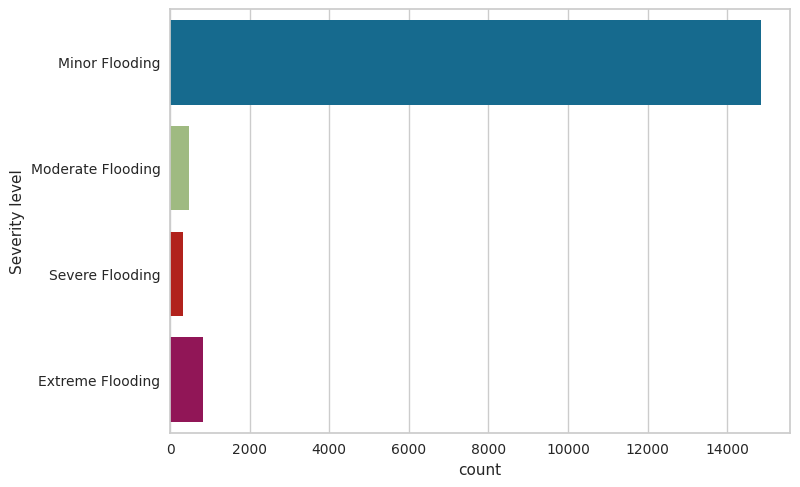

In [18]:
#Check distribution of target variable
sns.countplot(y='Severity level', data=flood_data)

**Key oberservation:**
* There is a huge imbalance in the class (this is expected)
* Most of the flood that hit the locations are categorised as Minor Flooding, i.e. not more than 25% of the area is covered by flood.
* Extreme Flooding is the next most common flood severity that hit the region with at least 75% of the rectangle area (1km square) covered by flood.


##### Landcover type


[2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 17]


<Axes: xlabel='LC_Type1_mode', ylabel='count'>

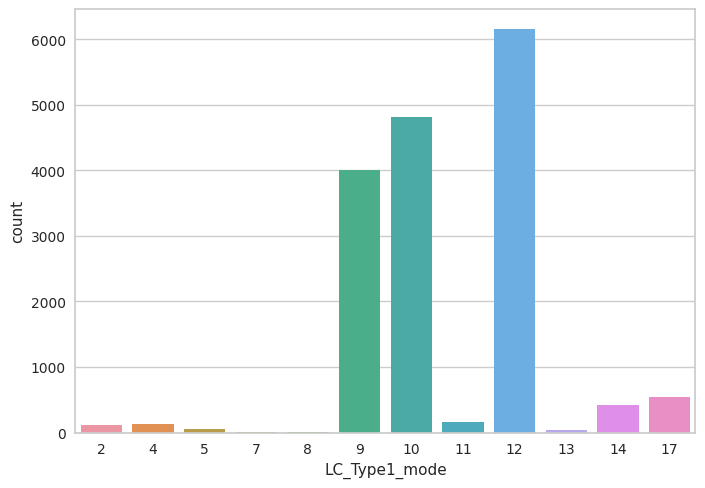

In [19]:
#unique entries for landcover types
print(sorted(flood_data['LC_Type1_mode'].unique()))

#Check distribution of land cover type variable
sns.countplot(x='LC_Type1_mode', data=flood_data)

**Key obersation:**
Southern Malawi has only 12 (out of 17) landcover types for this mode (LC_Type1).

Very few areas are already covered by water bodies. On the other hand, most of the land areas are covered by Savannas, Grasslands and Croplands.

* 2 - Evergreen Broadleaf Forests
* 4 - Deciduous Broadleaf Forests
* 5 - Mixed Forests
* 7 - Open Shrublands
* 8 - Woody Savannas
* 9 - Savannas
* 10 - Grasslands
* 11 - Permanent Wetlands
* 12 - Croplands
* 13 - Urban and Built-up Lands
* 14 - Cropland/Natural Vegetation Mosaics
* 17 - Water Bodies


Source: [LC_Type1 Class Table](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD12Q1#bands)

##### Elevation

The mean elevation is 592.8482061410488
The distribution of the elevation is skewed by ~1.08 degrees


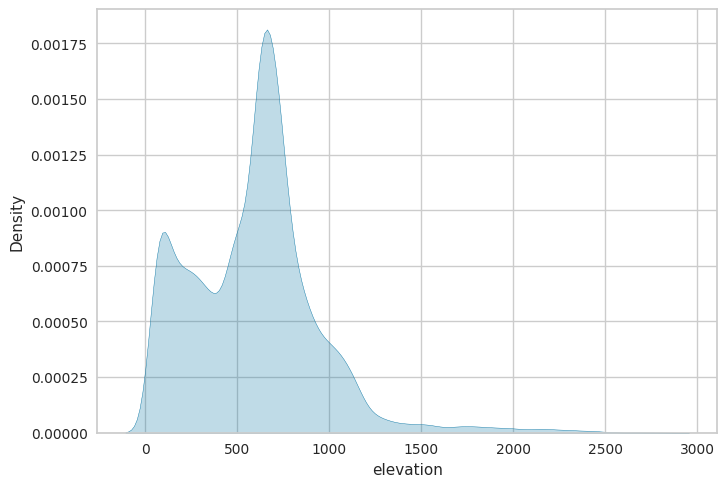

In [20]:
#distribution of elevation
sns.kdeplot(flood_data['elevation'], fill=True)

#mean of the elevation
print(f"The mean elevation is {flood_data['elevation'].mean()}")

#skewness
print(f"The distribution of the elevation is skewed by ~{round(flood_data['elevation'].skew(),2)} degrees")

**Key observation:**
- The distribution of the elevation plot is positiviely skewed.
- The elevation is bimodal (since it shows two peak points).

In [21]:
pd.crosstab(flood_data['Severity level'], flood_data['LC_Type1_mode'])

LC_Type1_mode,2,4,5,7,8,9,10,11,12,13,14,17
Severity level,,,,,,,,,,,,
Minor Flooding,117,129,51,1,6,3856,4323,86,5306,37,391,537
Moderate Flooding,5,2,1,0,1,82,154,13,191,2,19,2
Severe Flooding,0,0,0,0,0,29,133,10,142,2,4,0
Extreme Flooding,0,0,0,0,0,41,207,57,512,1,13,3


**Key Observation:**
- All land cover types are affected by minor flooding, more on Savannas, Grasslands, and Croplands
- Moderate, Severe and Extreme Flooding mostly affect Grasslands and Croplands, this will have great effect on food production and agriculture in general.

In [22]:
flood_data.columns

Index(['X', 'Y', 'Percentage Flood Area', 'elevation',
       'precip 2014-11-16 - 2014-11-23', 'precip 2014-11-23 - 2014-11-30',
       'precip 2014-11-30 - 2014-12-07', 'precip 2014-12-07 - 2014-12-14',
       'precip 2014-12-14 - 2014-12-21', 'precip 2014-12-21 - 2014-12-28',
       'precip 2014-12-28 - 2015-01-04', 'precip 2015-01-04 - 2015-01-11',
       'precip 2015-01-11 - 2015-01-18', 'precip 2015-01-18 - 2015-01-25',
       'precip 2015-01-25 - 2015-02-01', 'precip 2015-02-01 - 2015-02-08',
       'precip 2015-02-08 - 2015-02-15', 'precip 2015-02-15 - 2015-02-22',
       'precip 2015-02-22 - 2015-03-01', 'precip 2015-03-01 - 2015-03-08',
       'precip 2015-03-08 - 2015-03-15', 'LC_Type1_mode', 'Severity level'],
      dtype='object')

<Axes: xlabel='elevation', ylabel='Density'>

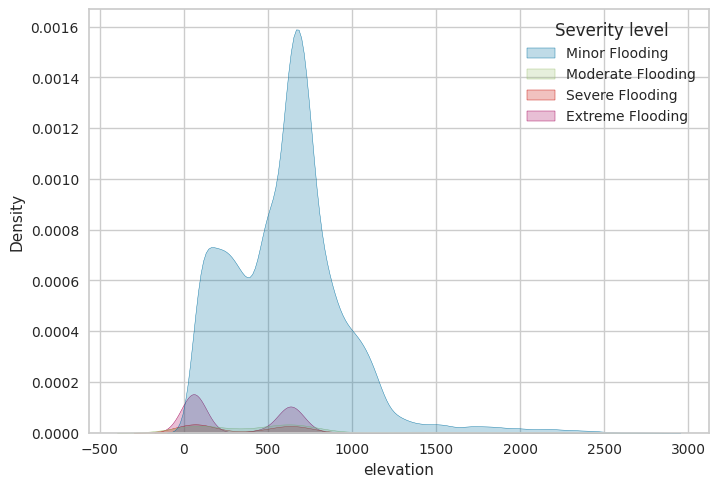

In [23]:
#density estimation plot showing flood severity level across different elevation

sns.kdeplot(data = flood_data, x='elevation', hue='Severity level', fill = True)

**Key Observation**
* Flooded area are indeed areas with low elevations
* Extreme flood cases hit these areas more.

<Axes: xlabel='LC_Type1_mode', ylabel='elevation'>

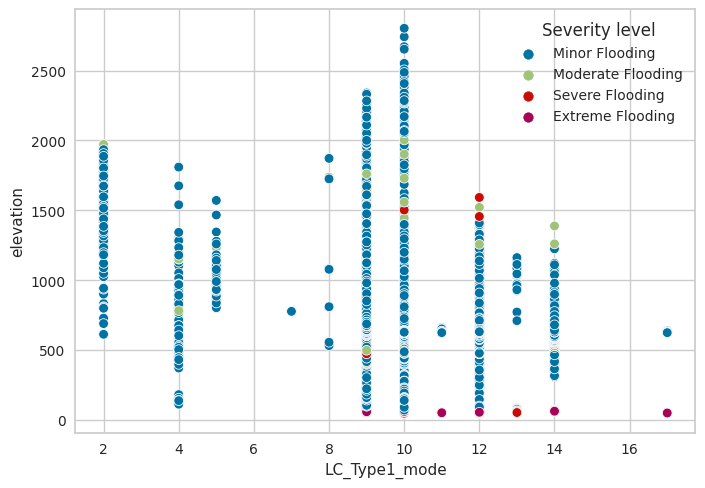

In [24]:
sns.scatterplot(x=flood_data['LC_Type1_mode'],
              y=flood_data['elevation'], hue=flood_data['Severity level'])

##### Outlier Detection

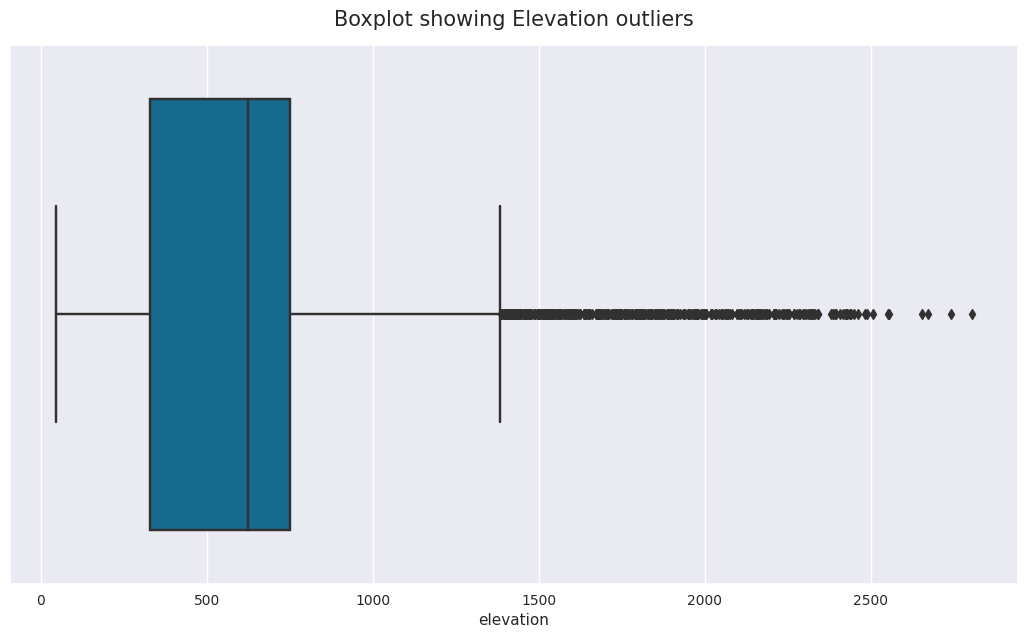

In [25]:
# Plotting boxplot for the elevation data
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(x=flood_data['elevation'])
plt.title('Boxplot showing Elevation outliers', y = 1.02, fontsize = 15)  
plt.show()

##### Precipitation Data

##### Some facts about Seasons in Malawi
* **Wet season** - December – April
* **Dry Season** - May – November

[Source](https://craftedafrica.com/malawi-weather/)

In [26]:
#List of key columns for the precipitation data

overall_rainfall_data = [
    'precip 2014-11-16 - 2014-11-23', 'precip 2014-11-23 - 2014-11-30',
    'precip 2014-11-30 - 2014-12-07', 'precip 2014-12-07 - 2014-12-14',
    'precip 2014-12-14 - 2014-12-21', 'precip 2014-12-21 - 2014-12-28',
    'precip 2014-12-28 - 2015-01-04', 'precip 2015-01-04 - 2015-01-11',
    'precip 2015-01-11 - 2015-01-18', 'precip 2015-01-18 - 2015-01-25',
    'precip 2015-01-25 - 2015-02-01', 'precip 2015-02-01 - 2015-02-08',
    'precip 2015-02-08 - 2015-02-15', 'precip 2015-02-15 - 2015-02-22',
    'precip 2015-02-22 - 2015-03-01', 'precip 2015-03-01 - 2015-03-08',
    'precip 2015-03-08 - 2015-03-15'
]

dry_season_rainfall = ['precip 2014-11-16 - 2014-11-23', 'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07']

#since dataset collected began 2 months (8 weeks) before flooding started
rainfall_before_flood = [
    'precip 2014-11-16 - 2014-11-23', 'precip 2014-11-23 - 2014-11-30',
    'precip 2014-11-30 - 2014-12-07', 'precip 2014-12-07 - 2014-12-14',
    'precip 2014-12-14 - 2014-12-21', 'precip 2014-12-21 - 2014-12-28',
    'precip 2014-12-28 - 2015-01-04', 'precip 2015-01-04 - 2015-01-11']

rainfall_during_flood = [
    'precip 2015-01-11 - 2015-01-18', 'precip 2015-01-18 - 2015-01-25',
    'precip 2015-01-25 - 2015-02-01', 'precip 2015-02-01 - 2015-02-08',
    'precip 2015-02-08 - 2015-02-15', 'precip 2015-02-15 - 2015-02-22',
    'precip 2015-02-22 - 2015-03-01', 'precip 2015-03-01 - 2015-03-08',
    'precip 2015-03-08 - 2015-03-15'
]

array([[<Axes: title={'center': 'precip 2014-11-16 - 2014-11-23'}>,
        <Axes: title={'center': 'precip 2014-11-23 - 2014-11-30'}>,
        <Axes: title={'center': 'precip 2014-11-30 - 2014-12-07'}>,
        <Axes: title={'center': 'precip 2014-12-07 - 2014-12-14'}>],
       [<Axes: title={'center': 'precip 2014-12-14 - 2014-12-21'}>,
        <Axes: title={'center': 'precip 2014-12-21 - 2014-12-28'}>,
        <Axes: title={'center': 'precip 2014-12-28 - 2015-01-04'}>,
        <Axes: title={'center': 'precip 2015-01-04 - 2015-01-11'}>],
       [<Axes: title={'center': 'precip 2015-01-11 - 2015-01-18'}>,
        <Axes: title={'center': 'precip 2015-01-18 - 2015-01-25'}>,
        <Axes: title={'center': 'precip 2015-01-25 - 2015-02-01'}>,
        <Axes: title={'center': 'precip 2015-02-01 - 2015-02-08'}>],
       [<Axes: title={'center': 'precip 2015-02-08 - 2015-02-15'}>,
        <Axes: title={'center': 'precip 2015-02-15 - 2015-02-22'}>,
        <Axes: title={'center': 'precip 2015-

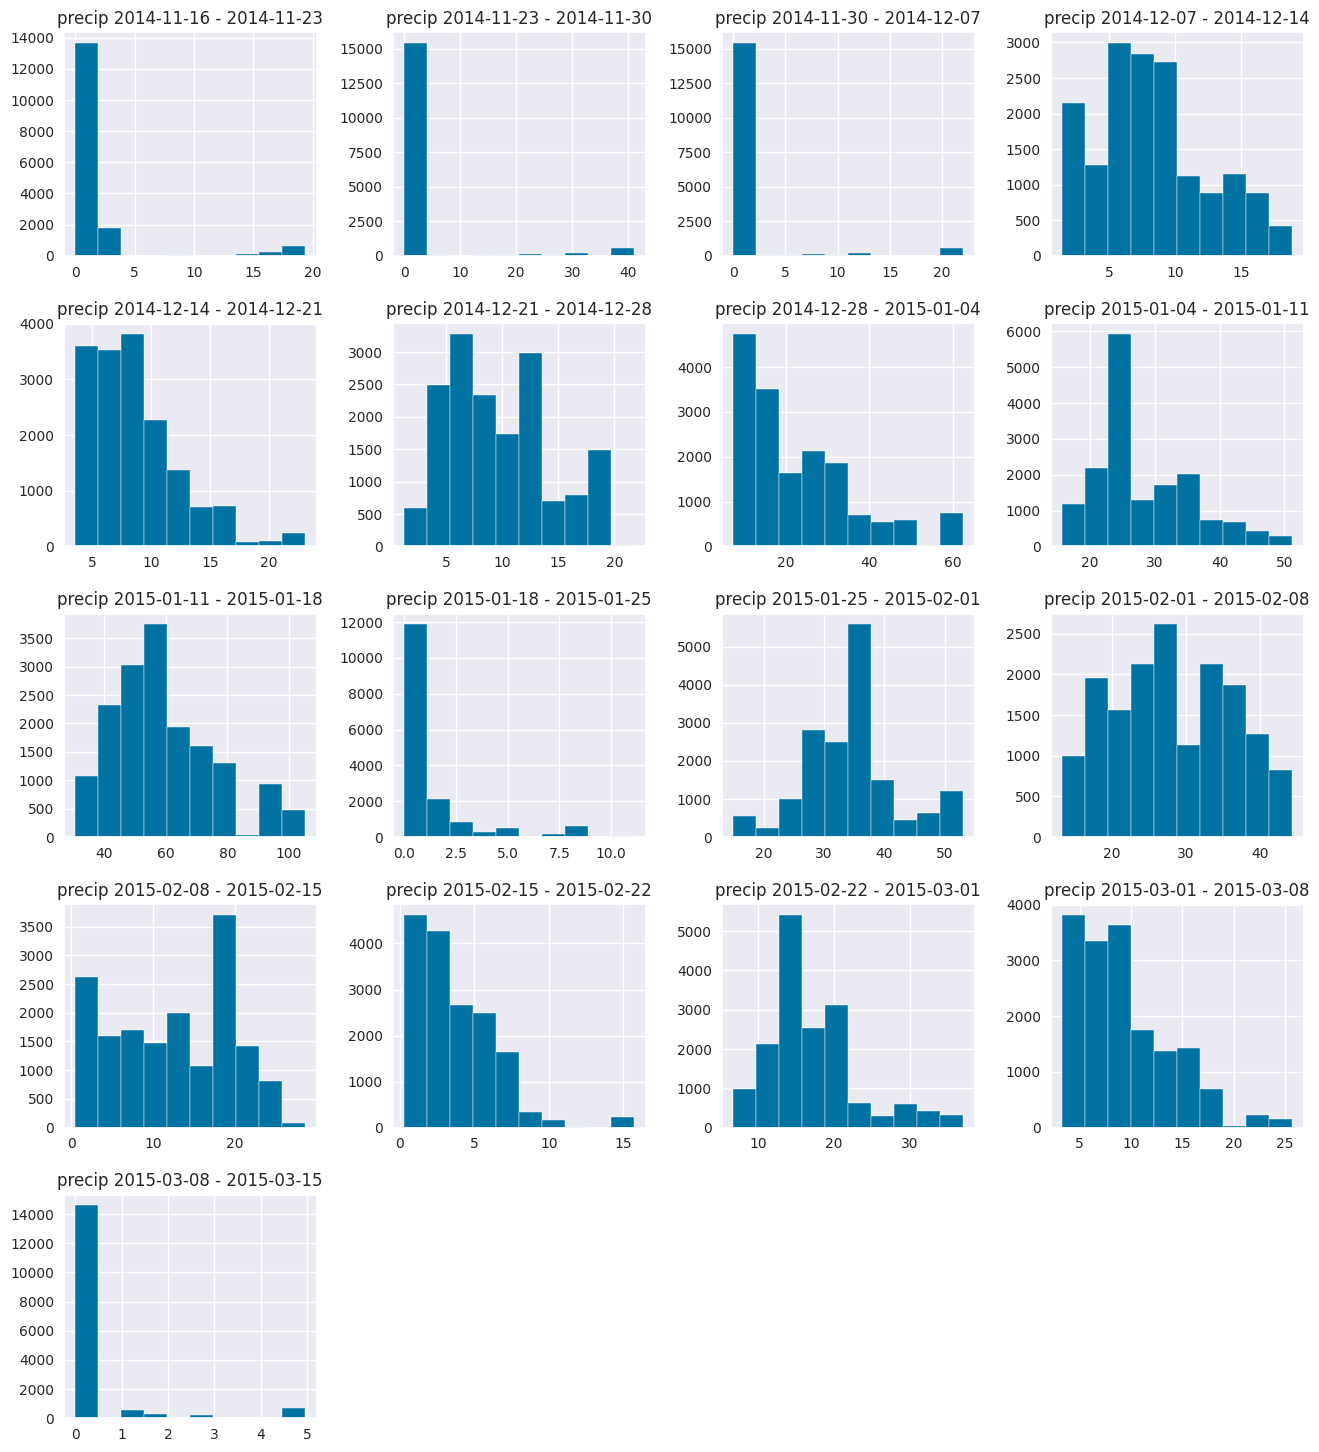

In [27]:
#check distribution of flood data
flood_data[overall_rainfall_data].hist(figsize=(16,18))

**Key observation**
- The rainfall distribution for most of the weeks are positively skewed

**Action to be taken:**
- The data will be normalised after splitting into train and test set to [avoid data leakage](https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26#:~:text=The%20recommended%20approach%20is%20to,results%20and%20unrealistic%20performance%20evaluations.)

In [28]:
#check relationship of rainfall data
#sns.pairplot(flood_data[overall_rainfall_data])

**Key Observation**
- There is presence of multicollinearity in the rainfall data as some rainfall data nearly have perfect relationsip. Further exploration will be done using correlation plot.

## Correlation

In [29]:
#transformation on target variable
# data transformation
flood_data['Severity level'] = flood_data['Severity level'].replace({'Minor Flooding': 0,
                                                                     'Moderate Flooding': 1,
                                                                    'Severe Flooding': 2,
                                                                     'Extreme Flooding': 3})

In [30]:
flood_data['Severity level'].unique()

[0, 1, 3, 2]
Categories (4, int64): [0 < 1 < 2 < 3]

In [31]:
# checking correlated features to the target
corr = flood_data.corr()['Severity level'].sort_values(ascending = False)#.head(20)
corr

Severity level                    1.000000
Percentage Flood Area             0.986171
precip 2015-03-08 - 2015-03-15    0.201231
precip 2015-03-01 - 2015-03-08    0.185302
precip 2014-12-21 - 2014-12-28    0.170180
precip 2014-11-23 - 2014-11-30    0.148711
precip 2014-11-30 - 2014-12-07    0.147534
precip 2014-11-16 - 2014-11-23    0.133328
X                                 0.129305
precip 2015-02-15 - 2015-02-22    0.104789
precip 2015-01-11 - 2015-01-18    0.096600
precip 2015-01-04 - 2015-01-11    0.074708
LC_Type1_mode                     0.068039
precip 2014-12-07 - 2014-12-14    0.065188
precip 2015-01-18 - 2015-01-25    0.057905
precip 2015-02-01 - 2015-02-08   -0.023650
precip 2015-01-25 - 2015-02-01   -0.085187
precip 2015-02-22 - 2015-03-01   -0.091122
Y                                -0.122287
precip 2014-12-14 - 2014-12-21   -0.131761
precip 2015-02-08 - 2015-02-15   -0.137717
precip 2014-12-28 - 2015-01-04   -0.161274
elevation                        -0.208324
Name: Sever

Percentage Flood area has a very strong correlation with the Severity Level

Text(0.5, 1.0, 'Correlation Chart')

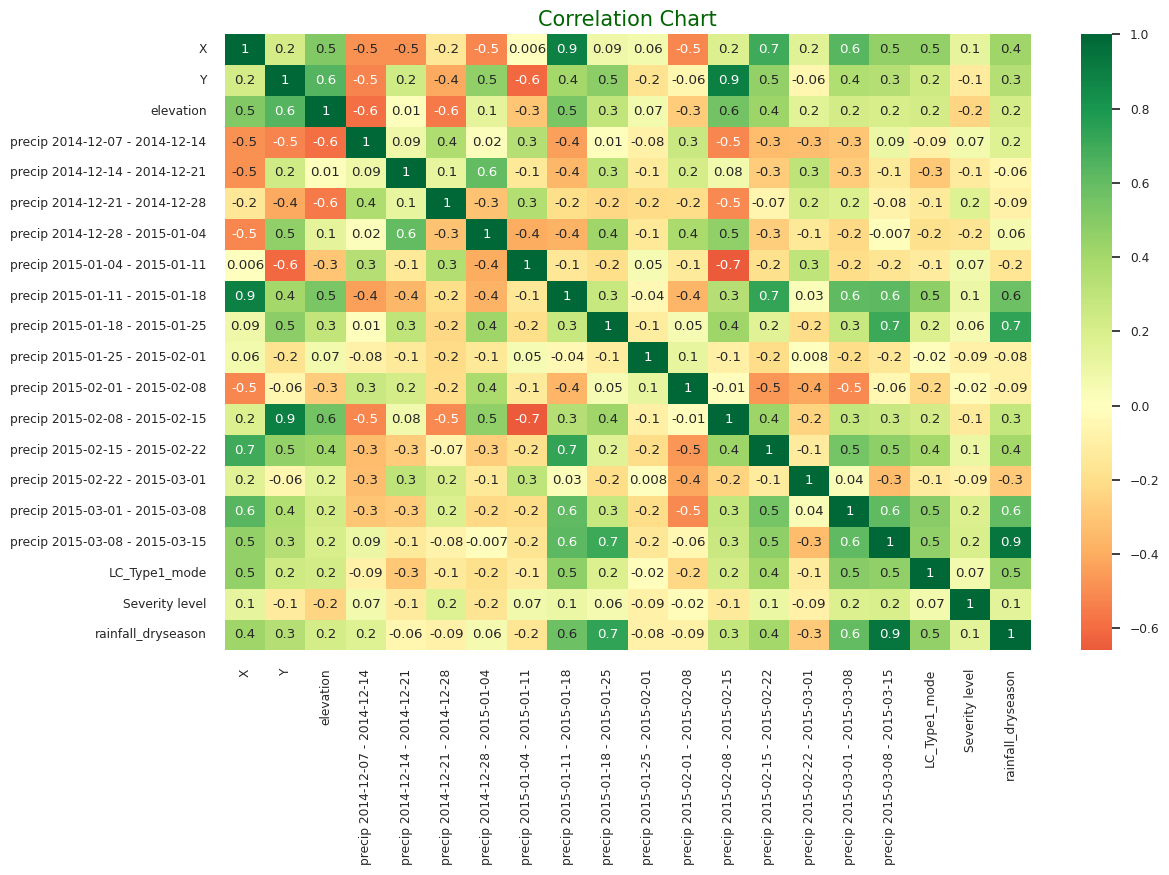

In [53]:
# Quantifying correlations between features
corr = flood_data.corr()
plt.figure(figsize = (13, 8))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0, fmt=".1g")
plt.title('Correlation Chart', fontsize = 15, color = 'darkgreen')

**Key Observations:**
- Multicollinearity exists as more than two features are nearly perfectly correlated with each other

Proposed approach to fixing this:
- drop features that are multicollinear or engineer a new feature using interaction effect (e.g averaging the the multicollinear rainfall columns

#### Feature Engineering

In [33]:
flood_data['rainfall_dryseason'] = (flood_data['precip 2014-11-16 - 2014-11-23']+ flood_data['precip 2014-11-23 - 2014-11-30']+flood_data['precip 2014-11-30 - 2014-12-07'])/3
flood_data.head(1)


,X,Y,Percentage Flood Area,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,LC_Type1_mode,Severity level,rainfall_dryseason
Square_ID,,,,,,,,,,,,,,,,,,,,,
4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,9,0,0.0


<Axes: >

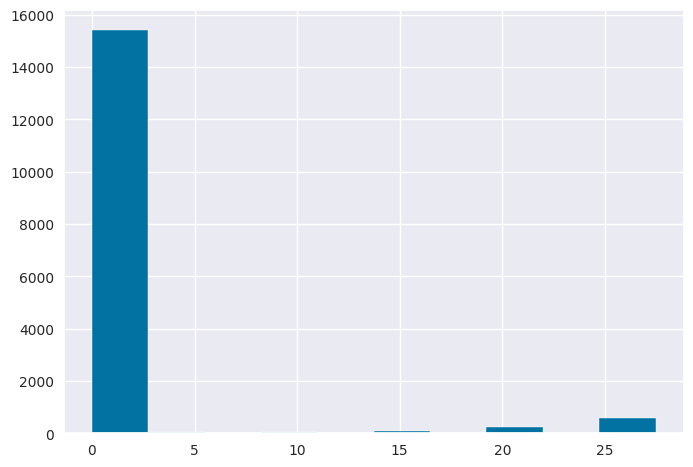

In [34]:
flood_data['rainfall_dryseason'].hist()

#### Data Preprocessing


In [35]:
print(flood_data['elevation'].quantile(0.75), flood_data['elevation'].mean())

751.43481265 592.8482061410488


<Axes: >

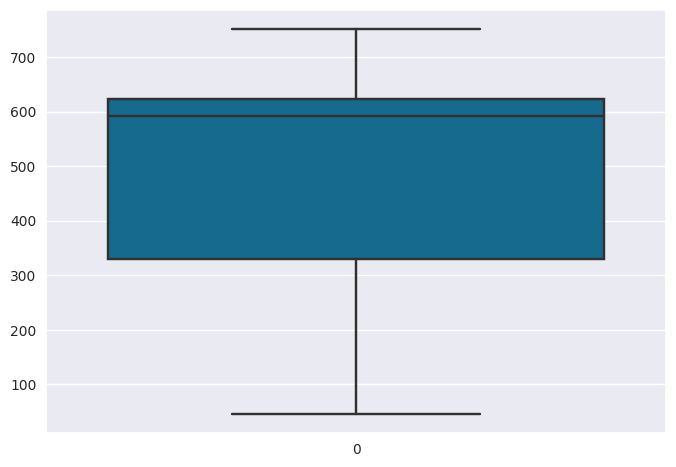

In [36]:
#handle outlier in elevation by replacing values greater than the 75th percentile with the mean elevation
flood_data['elevation'].loc[flood_data['elevation'] > flood_data['elevation'].quantile(0.75)] = flood_data['elevation'].mean()

#verify the change
sns.boxplot(flood_data['elevation'])

In [37]:
#drop unnecessary columns
drop_columns= dry_season_rainfall+['Percentage Flood Area']

flood_data = flood_data.drop(columns=drop_columns, axis=1)

flood_data.columns

Index(['X', 'Y', 'elevation', 'precip 2014-12-07 - 2014-12-14',
       'precip 2014-12-14 - 2014-12-21', 'precip 2014-12-21 - 2014-12-28',
       'precip 2014-12-28 - 2015-01-04', 'precip 2015-01-04 - 2015-01-11',
       'precip 2015-01-11 - 2015-01-18', 'precip 2015-01-18 - 2015-01-25',
       'precip 2015-01-25 - 2015-02-01', 'precip 2015-02-01 - 2015-02-08',
       'precip 2015-02-08 - 2015-02-15', 'precip 2015-02-15 - 2015-02-22',
       'precip 2015-02-22 - 2015-03-01', 'precip 2015-03-01 - 2015-03-08',
       'precip 2015-03-08 - 2015-03-15', 'LC_Type1_mode', 'Severity level',
       'rainfall_dryseason'],
      dtype='object')

##### splitting data into train, validation and test sets

In [38]:
#installing fast_ml
!pip install fast_ml --quiet

In [39]:
#importing 'train_valid_test_split'
from fast_ml.model_development import train_valid_test_split

#splitting the dataset using desired fraction
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(flood_data,
                                                                            target = 'Severity level',
                                                                           train_size = 0.6,
                                                                           valid_size = 0.2,
                                                                           test_size = 0.2,
                                                                           method = 'random',
                                                                           random_state = 999)

In [40]:
X_train.head()

,X,Y,elevation,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,LC_Type1_mode,rainfall_dryseason
Square_ID,,,,,,,,,,,,,,,,,,,
4e6a110c-14ce-11ea-bce5-f49634744a41,35.20,-15.42,592.848206,2.417890,13.173078,12.524376,26.487107,22.358911,55.813704,0.475722,31.577622,22.262417,18.643876,5.120276,28.940343,14.664835,0.0,12,0.000000
4e3c3af2-14ce-11ea-bce5-f49634744a41,34.45,-15.89,394.298813,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,9,0.000000
4e57c333-14ce-11ea-bce5-f49634744a41,34.76,-16.50,254.645715,16.960321,5.429096,14.390526,8.780278,42.519138,38.661564,0.000000,28.875948,24.696607,2.458964,3.628723,14.775983,5.850358,0.0,10,0.067835
4e6a12ef-14ce-11ea-bce5-f49634744a41,35.24,-15.71,592.848206,5.790888,6.265551,6.616071,17.284049,20.401909,55.501115,0.000000,40.064331,20.829629,18.681926,6.936359,13.769957,10.698462,0.0,12,0.000000
4e657f75-14ce-11ea-bce5-f49634744a41,34.93,-15.48,502.040785,9.618062,13.303895,12.744113,23.516251,15.648155,57.385677,0.628659,25.802371,32.942617,17.399040,3.320303,20.589136,8.459777,0.0,10,0.410388


#### Modelling using Pycaret

In [41]:
!pip install pycaret[full] --quiet
!pip install mlflow --quiet

In [42]:
#importing the classification module from pycaret
from pycaret.classification import *

In [43]:
# initialize setup
classifier = setup(flood_data, target = 'Severity level',  fix_imbalance= True, experiment_name = 'flood prediction')

,Description,Value
0,Session id,2507
1,Target,Severity level
2,Target type,Multiclass
3,Original data shape,"(16466, 20)"
4,Transformed data shape,"(46492, 20)"
5,Transformed train set shape,"(41552, 20)"
6,Transformed test set shape,"(4940, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [44]:
# compare all models
best = compare_models(n_select = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9134,0.9551,0.9134,0.9300,0.9211,0.5715,0.5749,8.3810
et,Extra Trees Classifier,0.9112,0.9520,0.9112,0.9290,0.9194,0.5635,0.5674,4.9350
dt,Decision Tree Classifier,0.9038,0.8656,0.9038,0.9264,0.9143,0.5367,0.5420,0.5570
dummy,Dummy Classifier,0.9013,0.5000,0.9013,0.8123,0.8545,0.0000,0.0000,0.1110
xgboost,Extreme Gradient Boosting,0.8962,0.9585,0.8962,0.9332,0.9129,0.5355,0.5476,3.8490
lightgbm,Light Gradient Boosting Machine,0.8878,0.9574,0.8878,0.9321,0.9078,0.5130,0.5282,3.9340
catboost,CatBoost Classifier,0.8862,0.9567,0.8862,0.9313,0.9065,0.5079,0.5235,25.7850
gbc,Gradient Boosting Classifier,0.8424,0.9429,0.8424,0.9281,0.8792,0.4264,0.4619,44.8340
knn,K Neighbors Classifier,0.8392,0.9059,0.8392,0.9268,0.8777,0.4039,0.4354,0.6500
ada,Ada Boost Classifier,0.7381,0.8964,0.7381,0.9198,0.8123,0.2689,0.3274,3.0550


Processing:   0%|          | 0/78 [00:00<?, ?it/s]

In [45]:
#Creating a random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9115,0.9528,0.9115,0.9262,0.9182,0.5704,0.5747
1,0.9081,0.9467,0.9081,0.9299,0.9182,0.5635,0.5695
2,0.9115,0.9381,0.9115,0.9229,0.9168,0.5525,0.5546
3,0.9098,0.9503,0.9098,0.9268,0.9179,0.5528,0.5557
4,0.9202,0.9587,0.9202,0.9320,0.9258,0.5969,0.5988
5,0.9081,0.9692,0.9081,0.9327,0.9194,0.5514,0.5556
6,0.9062,0.9555,0.9062,0.9312,0.9175,0.5428,0.5477
7,0.9245,0.9592,0.9245,0.9313,0.9277,0.6095,0.6107
8,0.9123,0.9485,0.9123,0.9278,0.9195,0.5639,0.5667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
#tuning the model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9055,0.7073,0.9055,0.8702,0.8870,0.4011,0.4105
1,0.9081,0.7161,0.9081,0.8731,0.8897,0.4230,0.4320
2,0.9063,0.6772,0.9063,0.8648,0.8850,0.3684,0.3848
3,0.9115,0.7320,0.9115,0.8762,0.8928,0.4475,0.4567
4,0.9081,0.7017,0.9081,0.8691,0.8879,0.3981,0.4114
5,0.9107,0.6860,0.9107,0.8680,0.8888,0.3916,0.4108
6,0.9028,0.6978,0.9028,0.8691,0.8850,0.3874,0.3954
7,0.9132,0.7165,0.9132,0.8752,0.8935,0.4346,0.4473
8,0.9089,0.6855,0.9089,0.8679,0.8878,0.3888,0.4052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


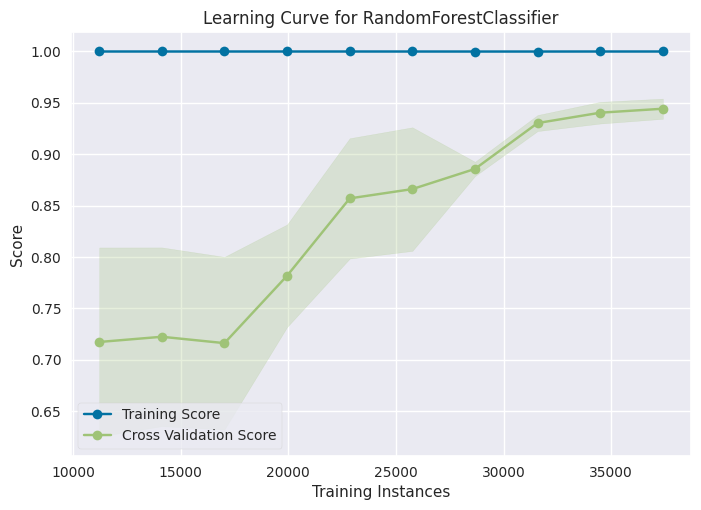

In [47]:
#learning curve of the model
plot_model(estimator = rf, plot = 'learning')

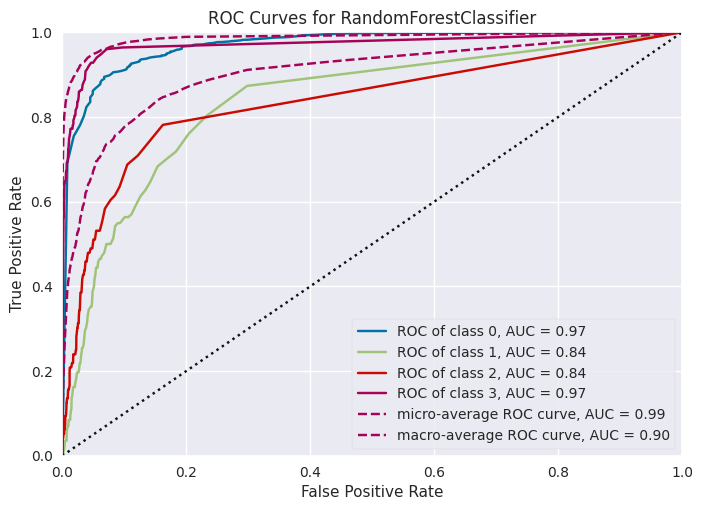

In [48]:
#plot of the AUC curve
plot_model(estimator = tuned_rf, plot = 'auc')

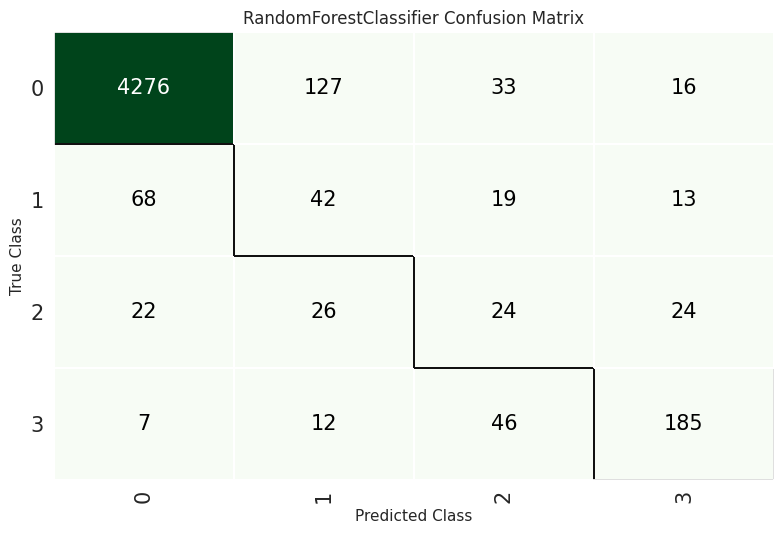

In [49]:
#confusion matrix plot
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

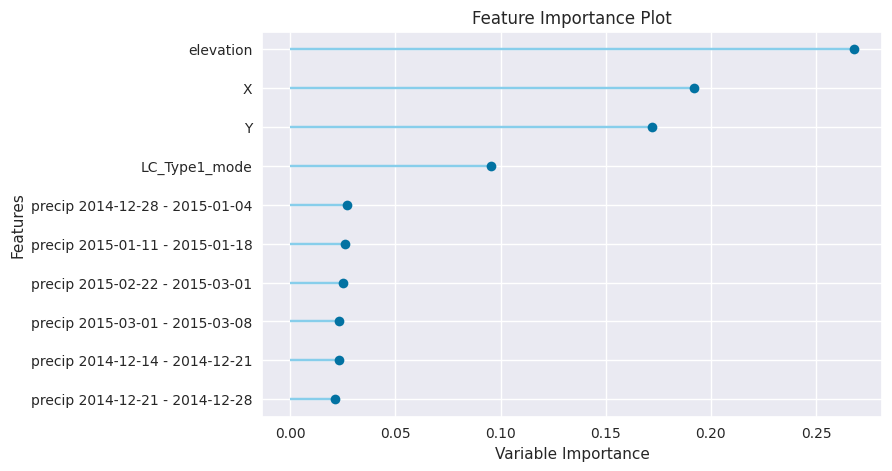

In [50]:
#feature Importance
plot_model(estimator = tuned_rf, plot = 'feature')
